# Task 1.2: Prediction with LSTM

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src.load_data import get_data
from src.train import FederatedLearning
from src.config import Config, load_train_config

import torch
torch.manual_seed(102)

## Specify parameters

### Manually set config

In [3]:
kwargs = {
    # Main mode
    "mode": "prediction",

    # Model config
    "model": "LSTM",
    "hidden_dim": 50,
    "num_layers": 1,
    "dropout": 0.0,

    # Training config
    "epochs": 500,
    "lr": 1e-3,
    "batch_size": 128
}

config = Config(**kwargs)

In [4]:
# Save config
#config.save("default_pred_lstm")

### Load saved config

In [5]:
config = load_train_config("config_default_pred_lstm")
print(config)

Config loaded from: config/config_default_pred_lstm.json
CONFIG:
  mode: prediction
  test_size: 0.2
  val_size: 0.1
  shuffle: True
  seed: 42
  model: LSTM
  input_dim: 1
  hidden_dim: 50
  output_dim: 1
  num_layers: 1
  dropout: 0.0
  epochs: 500
  lr: 0.001
  batch_size: 128
  eval_steps: 50


## Run FL training

In [6]:
x, y, splits, indices = get_data(config, return_index=True)
x_train, x_val, x_test, y_train, y_val, y_test = splits
train_idx, test_idx, val_idx = indices

In [7]:
fl = FederatedLearning(config)
fl.train(x_train, y_train, x_val, y_val)

TRAIN:
  Epoch: 1,  train loss: 134.55721, val loss: 667.81061
  Epoch: 50,  train loss: 37.65789, val loss: 384.37177
  Epoch: 100,  train loss: 24.84743, val loss: 66.64327
  Epoch: 150,  train loss: 17.40075, val loss: 49.78057
  Epoch: 200,  train loss: 14.98980, val loss: 47.94177
  Epoch: 250,  train loss: 15.16937, val loss: 47.08672
  Epoch: 300,  train loss: 24.47117, val loss: 47.28322
  Epoch: 350,  train loss: 16.25657, val loss: 46.79198
  Epoch: 400,  train loss: 13.68129, val loss: 46.55261
  Epoch: 450,  train loss: 19.07715, val loss: 46.47390
  Epoch: 500,  train loss: 15.54098, val loss: 46.94002
  Needed  1.88 minutes for training


NOTE: Execution time of LSTM a bit longer than of RNN!

### Analysis

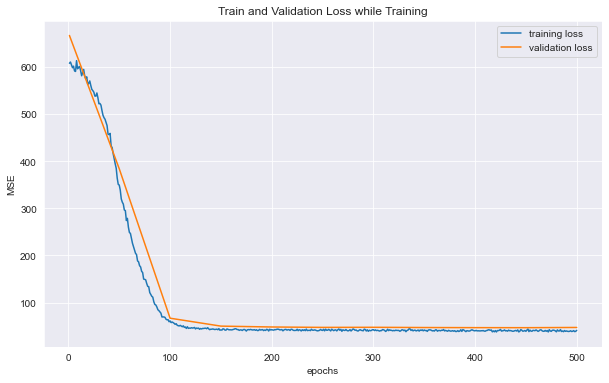

In [8]:
fl.plot_training_loss()

In [9]:
y_pred = fl.evaluation_metrics(x_test, y_test)

METRICS:
  Mean model Test MSE:  173.2198944091797
  Mean model Test RMSE: 13.161303520202637
  Model Test MSE:       47.8625602722168
  Model Test RMSE:      6.918277263641357


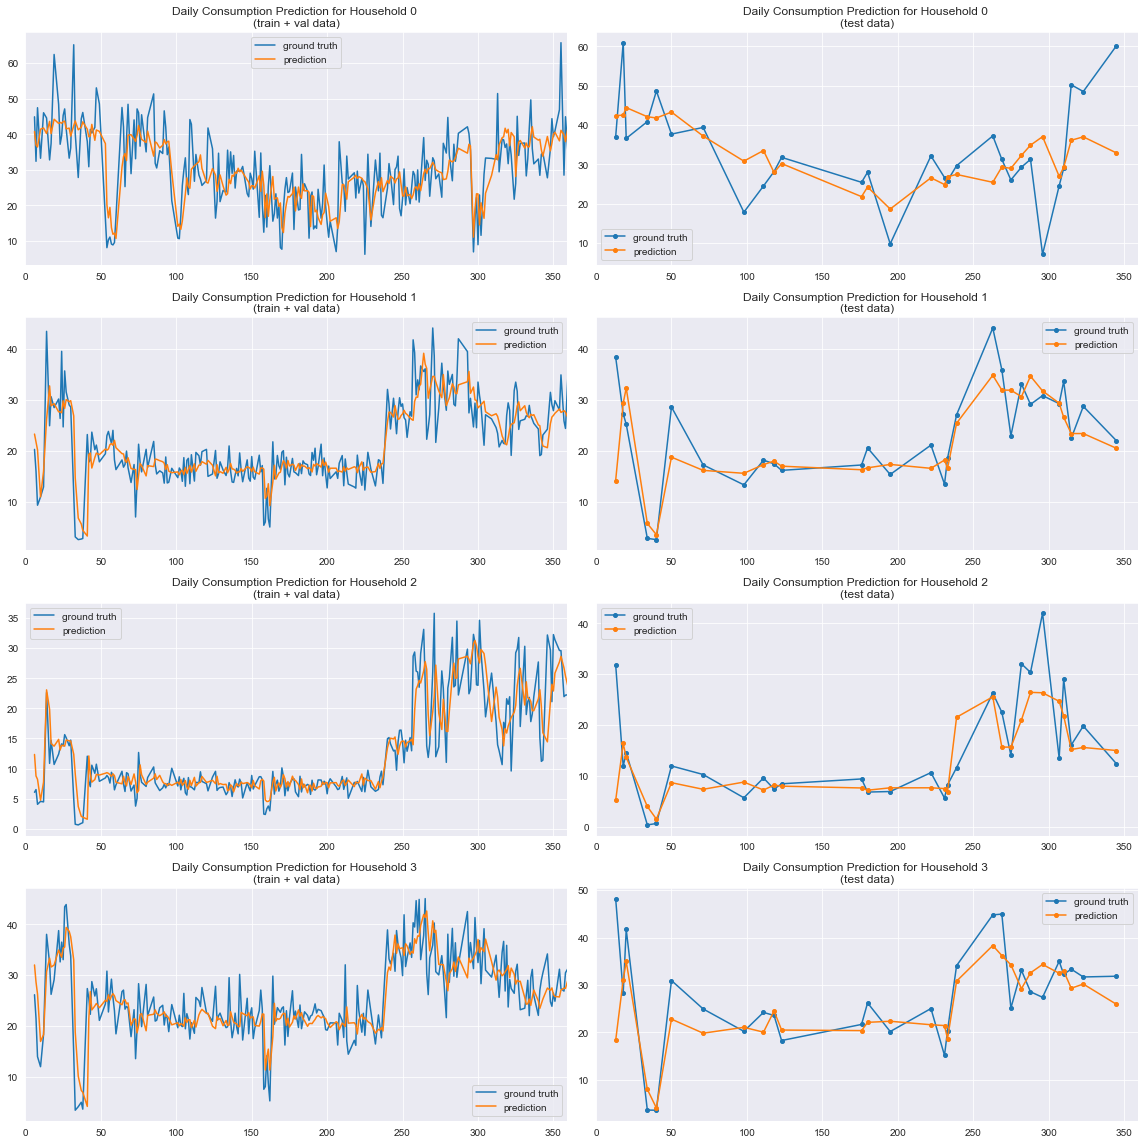

In [10]:
fl.plot_prediction_vs_label(x, y, train_idx, test_idx, val_idx, households=range(4))

## Run training with aggregated data

In [11]:
x, y, splits, indices = get_data(config, return_index=True)
x_train, x_val, x_test, y_train, y_val, y_test = splits
train_idx, test_idx, val_idx = indices

# Stack data to aggregate all households to one
x_train, x_val, x_test = [arr.reshape(1, arr.shape[0] * arr.shape[1], arr.shape[2]) for arr in [x_train, x_val, x_test]]
y_train, y_val, y_test = [arr.reshape(1, arr.shape[0] * arr.shape[1]) for arr in [y_train, y_val, y_test]]

In [12]:
fl_agg = FederatedLearning(config)
fl_agg.train(x_train, y_train, x_val, y_val)

TRAIN:
  Epoch: 1,  train loss: 595.70300, val loss: 660.94922
  Epoch: 50,  train loss: 339.40137, val loss: 350.84210
  Epoch: 100,  train loss: 70.90880, val loss: 72.15985
  Epoch: 150,  train loss: 63.69942, val loss: 51.24822
  Epoch: 200,  train loss: 37.34792, val loss: 50.93992
  Epoch: 250,  train loss: 29.64182, val loss: 49.18630
  Epoch: 300,  train loss: 33.59486, val loss: 49.62265
  Epoch: 350,  train loss: 36.54414, val loss: 50.66003
  Epoch: 400,  train loss: 44.17671, val loss: 47.89040
  Epoch: 450,  train loss: 26.26683, val loss: 48.02165
  Epoch: 500,  train loss: 51.37908, val loss: 48.66425
  Needed  0.05 minutes for training


### Analysis

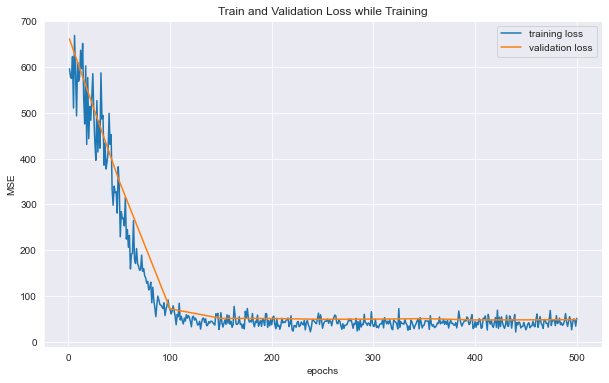

In [13]:
fl_agg.plot_training_loss()

In [14]:
fl_agg.evaluation_metrics(x_test, y_test)

METRICS:
  Mean model Test MSE:  173.2198944091797
  Mean model Test RMSE: 13.161303520202637
  Model Test MSE:       48.28272247314453
  Model Test RMSE:      6.948576927185059


tensor([[19.5850],
        [41.3547],
        [36.2246],
        ...,
        [ 5.7729],
        [ 6.4904],
        [ 3.3950]])

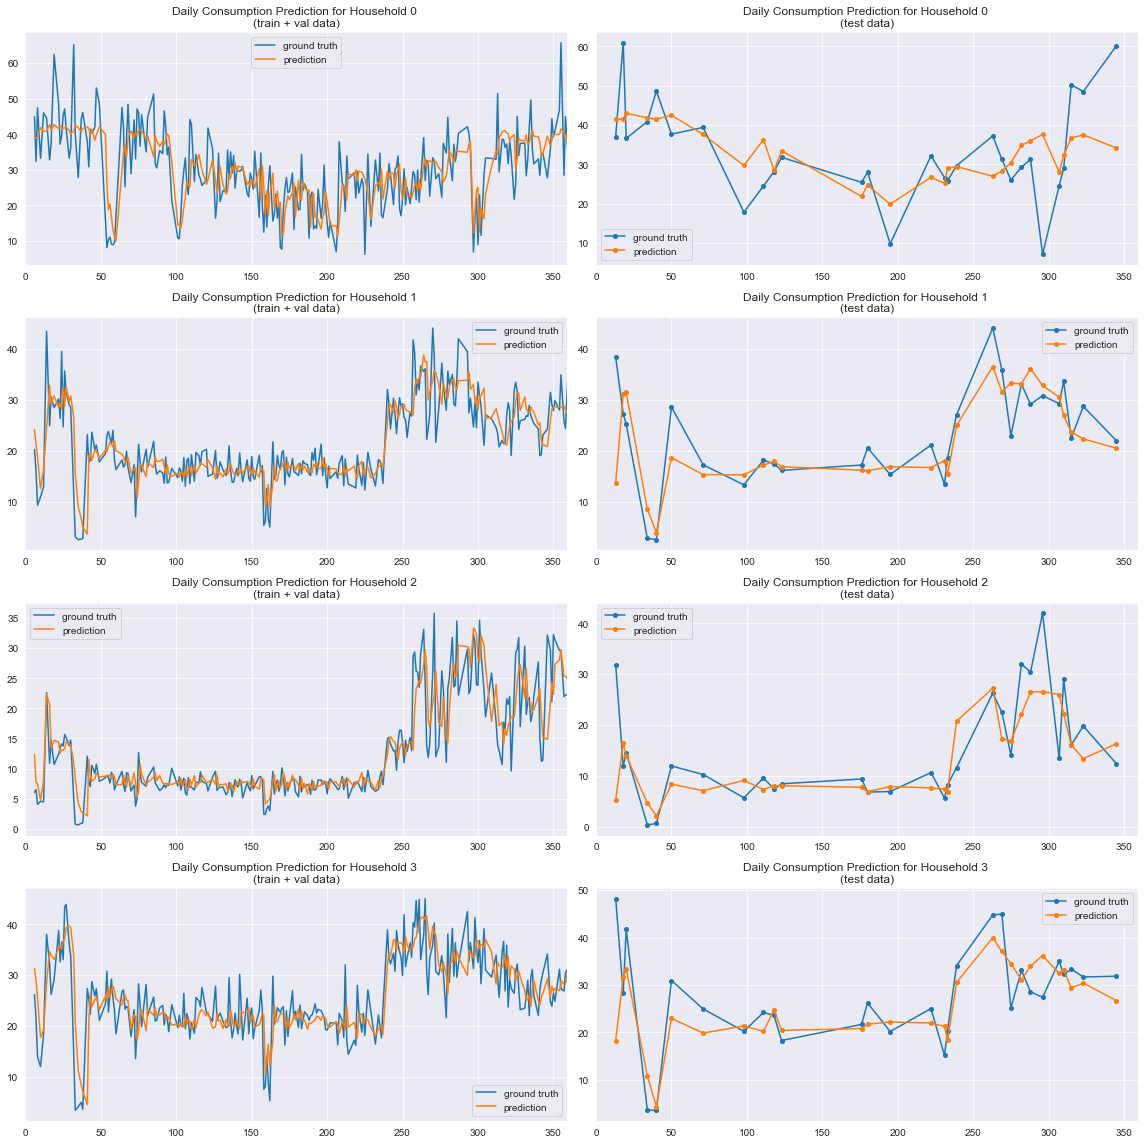

In [15]:
fl_agg.plot_prediction_vs_label(x, y, train_idx, test_idx, val_idx, households=range(4))